# Project: Investigate a Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## **Introduction**


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('dataset.csv', skiprows=[955, 2748, 3267, 4720, 5257, 7038, 7854]) # We skipped these rows because they have errors

## **Questions**

1.  What are the least 10 popular movies in the dataset?
2.  Which movie has the highest budget and what is its title?
3.  What is the average runtime of all the movies in the dataset?
4.  What is the average number of movies were released each year?
5.  Which movie has the highest average rating?
6.  What is the most popular genre?
7.  Which production company has produced the most movies?
8. Are there any trends in movie releases over the years?

<a id='wrangling'></a>
## **Data Wrangling**




### Problems identfying

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10872 entries, 0 to 10871
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     10872 non-null  object
 1   imdb_id                1923 non-null   object
 2   popularity             1924 non-null   object
 3   budget                 1915 non-null   object
 4   revenue                1914 non-null   object
 5   original_title         1915 non-null   object
 6   cast                   1904 non-null   object
 7   homepage               694 non-null    object
 8   director               1912 non-null   object
 9   tagline                1406 non-null   object
 10  keywords               1592 non-null   object
 11  overview               1773 non-null   object
 12  runtime                1725 non-null   object
 13  genres                 1686 non-null   object
 14  production_companies   1481 non-null   object
 15  release_date       

###### **Problems**


1.   Some columns have strange names
2.   Some datatypes of columns are wrong
3.   There is a lot of missing data
4.   There are a lot of duplicates



### Data Cleaning

#### **Problem 1**
Changing some column names that are unappropriate

###### Code

In [22]:
df['revenue_adj;;;;;;;;;;'] = df['revenue_adj;;;;;;;;;;'].str.replace(';', '')
df.rename(columns={'revenue_adj;;;;;;;;;;': 'revenue_adj'}, inplace=True)

###### Test

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10872 entries, 0 to 10871
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    10872 non-null  object
 1   imdb_id               1923 non-null   object
 2   popularity            1924 non-null   object
 3   budget                1915 non-null   object
 4   revenue               1914 non-null   object
 5   original_title        1915 non-null   object
 6   cast                  1904 non-null   object
 7   homepage              694 non-null    object
 8   director              1912 non-null   object
 9   tagline               1406 non-null   object
 10  keywords              1592 non-null   object
 11  overview              1773 non-null   object
 12  runtime               1725 non-null   object
 13  genres                1686 non-null   object
 14  production_companies  1481 non-null   object
 15  release_date          1641 non-null 

#### **Problem 2**
Changing some columns data type

###### Code

In [24]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['budget_adj'] = pd.to_numeric(df['budget_adj'], errors='coerce')
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue_adj'] = pd.to_numeric(df['revenue_adj'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')


we use this line of code to change datatype to float numeric
```
# df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
```

we use this line of code to change datatype to datetime
```
# df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
```


###### Test

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10872 entries, 0 to 10871
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10872 non-null  object        
 1   imdb_id               1923 non-null   object        
 2   popularity            1685 non-null   float64       
 3   budget                1657 non-null   float64       
 4   revenue               1640 non-null   float64       
 5   original_title        1915 non-null   object        
 6   cast                  1904 non-null   object        
 7   homepage              694 non-null    object        
 8   director              1912 non-null   object        
 9   tagline               1406 non-null   object        
 10  keywords              1592 non-null   object        
 11  overview              1773 non-null   object        
 12  runtime               1681 non-null   float64       
 13  genres          

#### **Problem 3**
Fill missing data

###### Code

In [26]:
df.fillna(method='bfill', inplace=True)
df['popularity'].fillna(df['popularity'].mean(), inplace=True)
df['budget'].fillna(df['budget'].median(), inplace=True)
df['revenue'].fillna(df['revenue'].median(), inplace=True)
df['release_date'].fillna(method='ffill', inplace=True)
df['vote_count'].fillna(df['vote_count'].mean(), inplace=True)
df['vote_average'].fillna(df['vote_average'].mean(), inplace=True)
df['release_year'].fillna(df['release_year'].median(), inplace=True)
df['budget_adj'].fillna(df['budget_adj'].median(), inplace=True)
df['revenue_adj'].fillna(df['revenue_adj'].median(), inplace=True)
df['homepage'].fillna(method='ffill', inplace=True)
df['production_companies'].fillna(method='ffill', inplace=True)
df['runtime'].interpolate(method='linear', inplace=True)

###### Test

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10872 entries, 0 to 10871
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10872 non-null  object        
 1   imdb_id               10860 non-null  object        
 2   popularity            10872 non-null  float64       
 3   budget                10872 non-null  float64       
 4   revenue               10872 non-null  float64       
 5   original_title        10860 non-null  object        
 6   cast                  10860 non-null  object        
 7   homepage              10872 non-null  object        
 8   director              10860 non-null  object        
 9   tagline               10860 non-null  object        
 10  keywords              10860 non-null  object        
 11  overview              10860 non-null  object        
 12  runtime               10872 non-null  float64       
 13  genres          

#### **Problem 4**
Remove all duplicates

###### Code

In [28]:
df.drop_duplicates(subset='imdb_id', keep='first', inplace=True)

###### Test

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 10860
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1896 non-null   object        
 1   imdb_id               1895 non-null   object        
 2   popularity            1896 non-null   float64       
 3   budget                1896 non-null   float64       
 4   revenue               1896 non-null   float64       
 5   original_title        1895 non-null   object        
 6   cast                  1895 non-null   object        
 7   homepage              1896 non-null   object        
 8   director              1895 non-null   object        
 9   tagline               1895 non-null   object        
 10  keywords              1895 non-null   object        
 11  overview              1895 non-null   object        
 12  runtime               1896 non-null   float64       
 13  genres           

<a id='eda'></a>
## **Exploratory Data Analysis**

#### Question 1
What are the least 10 popular movies in the dataset?

In [30]:
least_10_popular_movies = df.sort_values(by='popularity', ascending=True).head(10)
print(least_10_popular_movies[['original_title', 'popularity']])

                             original_title  popularity
6549             Mon petit doigt m'a dit...    0.000973
4919   Freddie Mercury: The Great Pretender    0.001635
1386       Emmet Otter's Jug-Band Christmas    0.002457
3364  Foo Fighters: Live at Wembley Stadium    0.002475
3366                              How to Be    0.002514
6046                          Zero Charisma    0.003066
7266               In questo mondo di ladri    0.003456
1323              Humpty Sharma Ki Dulhania    0.004282
4940                          Sonet Film AB    0.004887
4941                                Heroine    0.004887


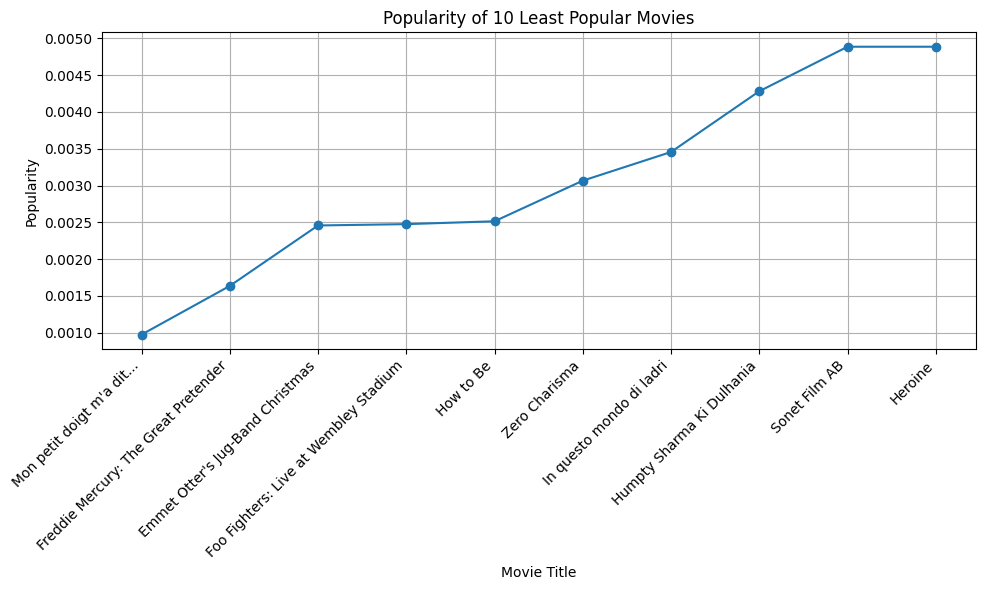

In [42]:
least_10_popular_movies = df.sort_values(by='popularity', ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.plot(least_10_popular_movies['original_title'], least_10_popular_movies['popularity'], marker='o', linestyle='-')
plt.title('Popularity of 10 Least Popular Movies')
plt.xlabel('Movie Title')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

They are :-
1.  Mon petit doigt m'a dit...    
2.   Freddie Mercury: The Great Pretender    
3.   Emmet Otter's Jug-Band Christmas    
4.   Foo Fighters: Live at Wembley Stadium    
5.   How to Be    
6.   Zero Charisma    
7.   In questo mondo di ladri    
8.   Humpty Sharma Ki Dulhania    
9.   Heroine    
10.  Sonet Film AB

#### Question 2
Which movie has the highest budget and what is its title?

In [31]:
highest_movie_budget = df.sort_values(by='budget', ascending=False).head(1)
print(highest_movie_budget[['original_title', 'budget']])

     original_title       budget
3386         Cars 2  200000000.0


The movie is Cars 2 by budget 20 Million dollars

#### Question 3
What is the average runtime of all the movies in the dataset?

In [32]:
avg_runtime = df['runtime'].mean()
print(avg_runtime)

300002.7199076999


The average runtime is about 300002.72 minutes

#### Question 4
What is the average number of movies were released each year?

In [33]:
movies_per_year = df.groupby('release_year').size()
average_movies_per_year = round(movies_per_year.mean())
print("Average number of movies released per year:", average_movies_per_year)

Average number of movies released per year: 33


As you can see the average number of movies released per year is about 33 movies

#### Question 5
Which movie has the highest average rating?

In [34]:
highest_avg_rating = df.sort_values(by='vote_average', ascending=False).head(1)
print(highest_avg_rating[['original_title', 'vote_average']])

              original_title  vote_average
4299   forgotten and furious        1994.0


The higest rated movie is forgotten and furious by rating 1994

#### Question 6
What is the most popular genre?

In [35]:
# First we have to seperate each genre
genre_dummies = df['genres'].str.get_dummies('|')
conut_genres = genre_dummies.sum().sort_values(ascending=False).reset_index().rename(columns={0:"count"})
conut_genres.head()

,index,count
0,Drama,843
1,Comedy,594
2,Thriller,553
3,Action,336
4,Horror,297


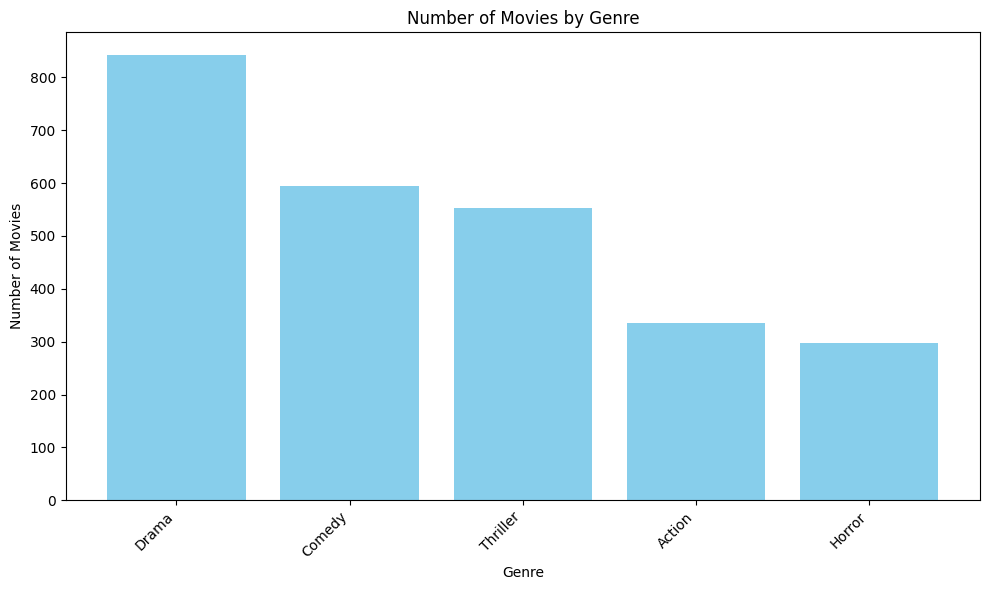

In [36]:
categories = ['Drama', 'Comedy', 'Thriller', 'Action', 'Horror']
counts = [843, 594, 553, 336, 297]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='skyblue')
plt.title('Number of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The most popular genre is Drame by about 843 movies

#### Question 7
Which production company has produced the most movies?

In [37]:
def find_most_common_production_company(df):
    production_company_counts = df['production_companies'].value_counts()
    most_common_production_company = production_company_counts.idxmax()
    max_movies_produced = production_company_counts.max()

    print(f"The production company that has produced the most movies is: {most_common_production_company}")
    print(f"Number of movies produced: {max_movies_produced}")

find_most_common_production_company(df)

The production company that has produced the most movies is: Paramount Pictures
Number of movies produced: 40


The production company that has produced the most movies is Paramount Pictures wich produced 40 movies

#### Question 8
Are there any trends in movie releases over the years?

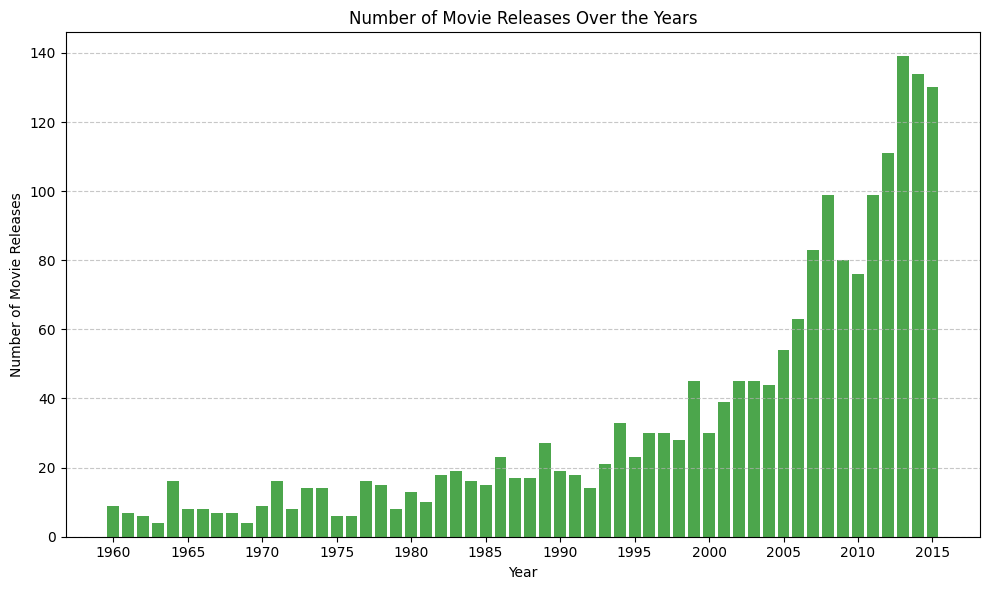

In [44]:
df_filtered = df[df['release_year'] != 588444.624639265]  # Excluding non-year values
movie_counts_by_year = df_filtered.groupby('release_year').size()

plt.figure(figsize=(10, 6))
plt.bar(movie_counts_by_year.index, movie_counts_by_year.values, color='green', alpha=0.7)
plt.title('Number of Movie Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movie Releases')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(int(min(movie_counts_by_year.index)), int(max(movie_counts_by_year.index))+1, 5))
plt.tight_layout()
plt.show()

The higest year that have movies released is 2013

<a id='conclusions'></a>
## **Conclusions**

> **First**: During the data exploration process, I cleaned and prepared the dataset by handling missing values and converting data types. i explored trends in movie releases over the years, identifying fluctuations and patterns in the number of releases.

> **Second**: In relation to the questions provided at the beginning of the analysis, my findings suggest that there is a general upward trend in the number of movie releases over the years, with occasional fluctuations observed. However, further analysis is needed to understand the underlying factors driving these trends.

> **Third**: While my analysis provides valuable insights into movie release trends, there are areas where additional research could enhance my understanding. For example, investigating the impact of external factors such as economic conditions or technological advancements on movie release patterns could provide valuable context.

> **Fourth**: It's important to note that correlation does not imply causation. While I observed correlations between certain variables, such as release year and the number of movie releases, further research is needed to establish causal relationships.



## **Limitations**

One limitation of my analysis is the absence of consideration for seasonal variations in movie releases. Seasonal trends, such as the holiday season or summer blockbusters, may influence the number of movie releases in specific months or quarters. Ignoring these variations may lead to an incomplete understanding of the factors driving movie release patterns.

Additionally, while my analysis identifies correlations between variables such as release year and the number of movie releases, it's essential to recognize that correlation does not imply causation. Further research is necessary to investigate causal relationships and determine the underlying factors influencing movie release trends over time.

Furthermore, my analysis is based solely on the provided dataset, which may have limitations or biases inherent in its collection process. External factors not accounted for in the dataset, such as changes in consumer behavior or regulatory changes in the film industry, could also impact movie release trends.

Overall, while my analysis offers valuable insights, it's important to interpret the findings with caution and consider the limitations outlined above when drawing conclusions or making decisions based on the results.